In [ ]:
!pip install pandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# New Section

In [6]:
data= pd.read_csv("dataset.csv")
data.head(8)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000


In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [46]:
x=data.LotArea.mean()
y=data.SalePrice.max()
z=data.SalePrice.mean()
print(int(x),y,z)

10516 755000 180921.19589041095


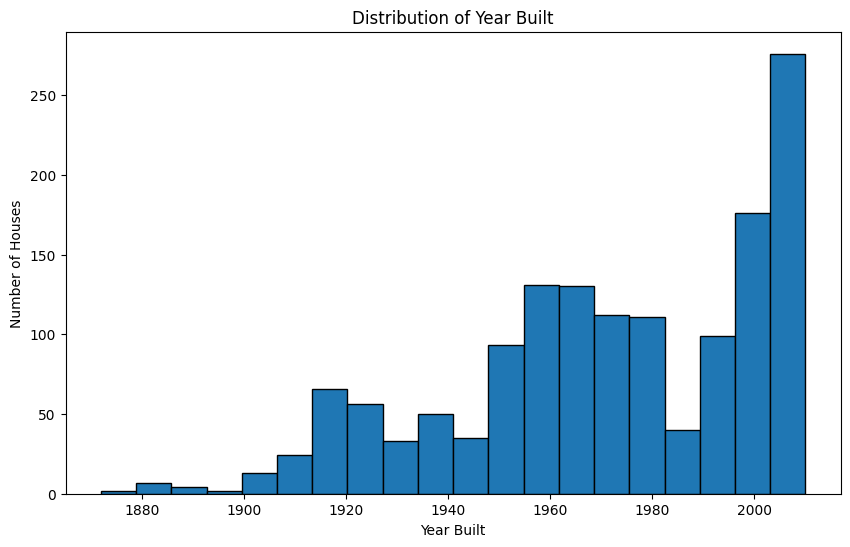

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Year Built
plt.figure(figsize=(10, 6))
plt.hist(data['YearBuilt'], bins=20, edgecolor='k')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.title('Distribution of Year Built')
plt.show()

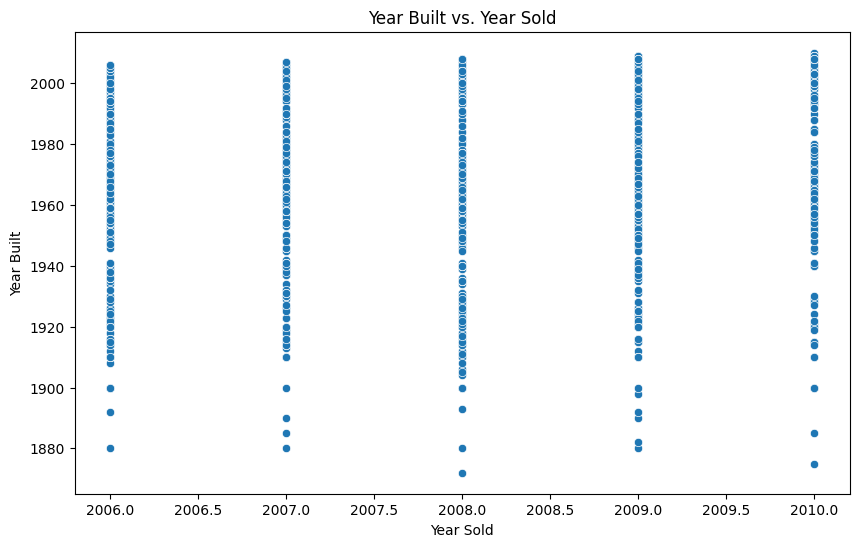

In [10]:
# Scatter plot of Year Built vs. Year Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YrSold', y='YearBuilt', data=data)
plt.xlabel('Year Sold')
plt.ylabel('Year Built')
plt.title('Year Built vs. Year Sold')
plt.show()

Both reasons are plausible, but based on the available data, Reason 1 appears more likely:

The scatter plot and histogram indicate a real decline in the construction of new houses approaching 2010, suggesting that fewer new houses were being built recently in the area of data collection.

In [11]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
y=data.SalePrice
X=data[['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd']]

In [14]:

missing_in_all = X.columns[X.isna().all()]

# Drop columns with missing values in all rows
X.drop(missing_in_all, axis=1, inplace=True)

print(X)

      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0        8450       2003       856       854         2             3   
1        9600       1976      1262         0         2             3   
2       11250       2001       920       866         2             3   
3        9550       1915       961       756         1             3   
4       14260       2000      1145      1053         2             4   
...       ...        ...       ...       ...       ...           ...   
1455     7917       1999       953       694         2             3   
1456    13175       1978      2073         0         2             3   
1457     9042       1941      1188      1152         2             4   
1458     9717       1950      1078         0         1             2   
1459     9937       1965      1256         0         1             3   

      TotRmsAbvGrd  
0                8  
1                6  
2                6  
3                7  
4                9  
...      

<ipython-input-14-6d19860bebaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(missing_in_all, axis=1, inplace=True)


In [18]:
linear_model = LinearRegression()
linear_model.fit(X, y)
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(linear_model.predict(X.head()))

Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[219164.64359536 161876.1612803  217670.6719971  141704.32600794
 256836.17725416]


In [16]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [23]:
from sklearn.tree import DecisionTreeRegressor
# Define model. Specify a number for random_state to ensure same results each run
tree_model = DecisionTreeRegressor(random_state=1)

# Fit model
tree_model.fit(X, y)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(tree_model.predict(X.head()))

Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[208500. 181500. 223500. 140000. 250000.]


In [24]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

yes the surprising thing is that ,the decision tree algorothm is making excat precidtion.this can be the case of overfitting also


In [26]:
from sklearn.metrics import mean_absolute_error

predicted_prices_LinearReg = linear_model.predict(X)
#using linear regression model
mean_absolute_error(y, predicted_prices_LinearReg)

27667.254099950267

In [27]:
from sklearn.metrics import mean_absolute_error

predicted_prices_DecisionTree= tree_model.predict(X)
# using linear regression model
mean_absolute_error(y, predicted_prices_DecisionTree)

62.35433789954339

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=1)
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
921,8777,1900,1272,928,2,4,9
520,10800,1900,694,600,2,3,7
401,8767,2005,1310,0,2,3,6
280,11287,1989,1175,807,2,3,7
1401,7415,2004,864,729,2,3,8


In [39]:
y_train.head()

921     145900
520     106250
401     164990
280     228500
1401    193000
Name: SalePrice, dtype: int64

In [44]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_valid)
val_predictions= linear_model.predict(X_valid)
print(mean_absolute_error(y_valid, val_predictions))

27826.061232079297


In [45]:
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_valid)
val_predictions= tree_model.predict(X_valid)
print(mean_absolute_error(y_valid, val_predictions))

30642.671232876713


In [42]:
comparison_df = pd.DataFrame({'Actual': y_valid, 'Linear Predictions': linear_preds, 'Tree Predictions': tree_preds})
comparison_df.head()

,Actual,Linear Predictions,Tree Predictions
258,231500,223824.997383,195000.0
267,179500,158038.215824,108000.0
288,122000,108984.727542,130000.0
649,84500,101842.897851,81000.0
1233,142000,140651.375556,177000.0


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Linear Predictions'].plot(kind='hist', bins=20, title='Linear Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Tree Predictions'].plot(kind='hist', bins=20, title='Tree Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='Actual', y='Linear Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Linear Predictions', y='Tree Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Linear Predictions'].plot(kind='line', figsize=(8, 4), title='Linear Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Tree Predictions'].plot(kind='line', figsize=(8, 4), title='Tree Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Linear Predictions'].plot(kind='hist', bins=20, title='Linear Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Tree Predictions'].plot(kind='hist', bins=20, title='Tree Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='index', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Actual', y='Linear Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14.plot(kind='scatter', x='Linear Predictions', y='Tree Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Actual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Actual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Linear Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_16.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Linear Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Tree Predictions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Tree Predictions')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_19['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Linear Predictions'].plot(kind='line', figsize=(8, 4), title='Linear Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Tree Predictions'].plot(kind='line', figsize=(8, 4), title='Tree Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

as we see in in-sample predicitions MAE of linear model and tree model are far away from each other i.e.27667.254099950267,63 respectively so for tree model it is a case of overfitting as MAE should be nearly quater of saleprice which is 45230.5 and while MAE of both model in validation date is nearly aroung 28000

A relative MAE of 62.22% means that, on average, the model's predictions deviate from the actual prices by around 62.22% of the average house price. This is quite high, indicating that the model's predictions are not very accurate. Typically, a good model would have a much lower relative MAE. For real estate pricing, a relative MAE below 10-20% might be more acceptable.
